## Análisis Exploratorio

In [2]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Comprobación Datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Distribución de Datos 

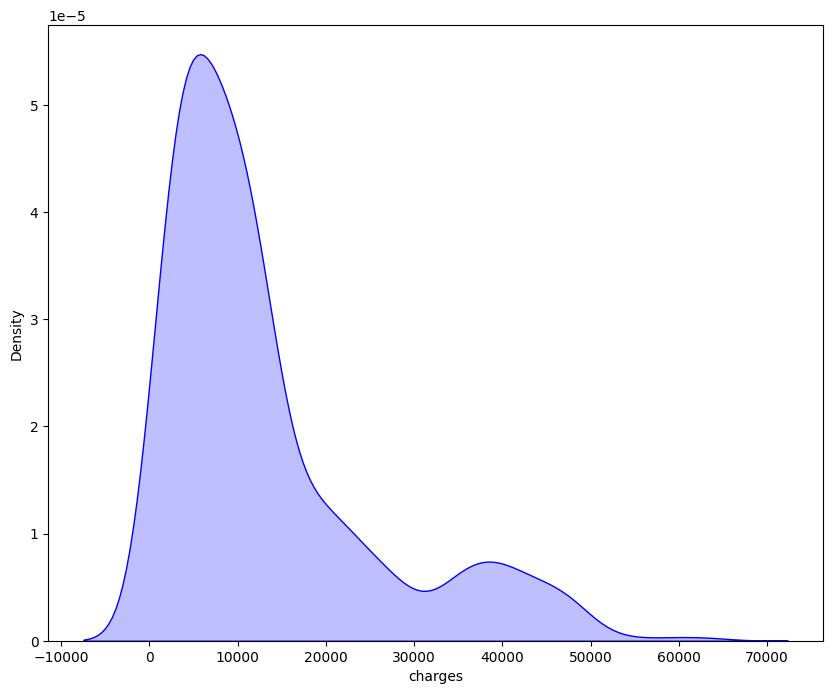

In [7]:
# Distribución la variable charges

sns.distplot(
    df.charges, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

### Variables numéricas


In [8]:
# Principales estadísticos de las variables numéricas

df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


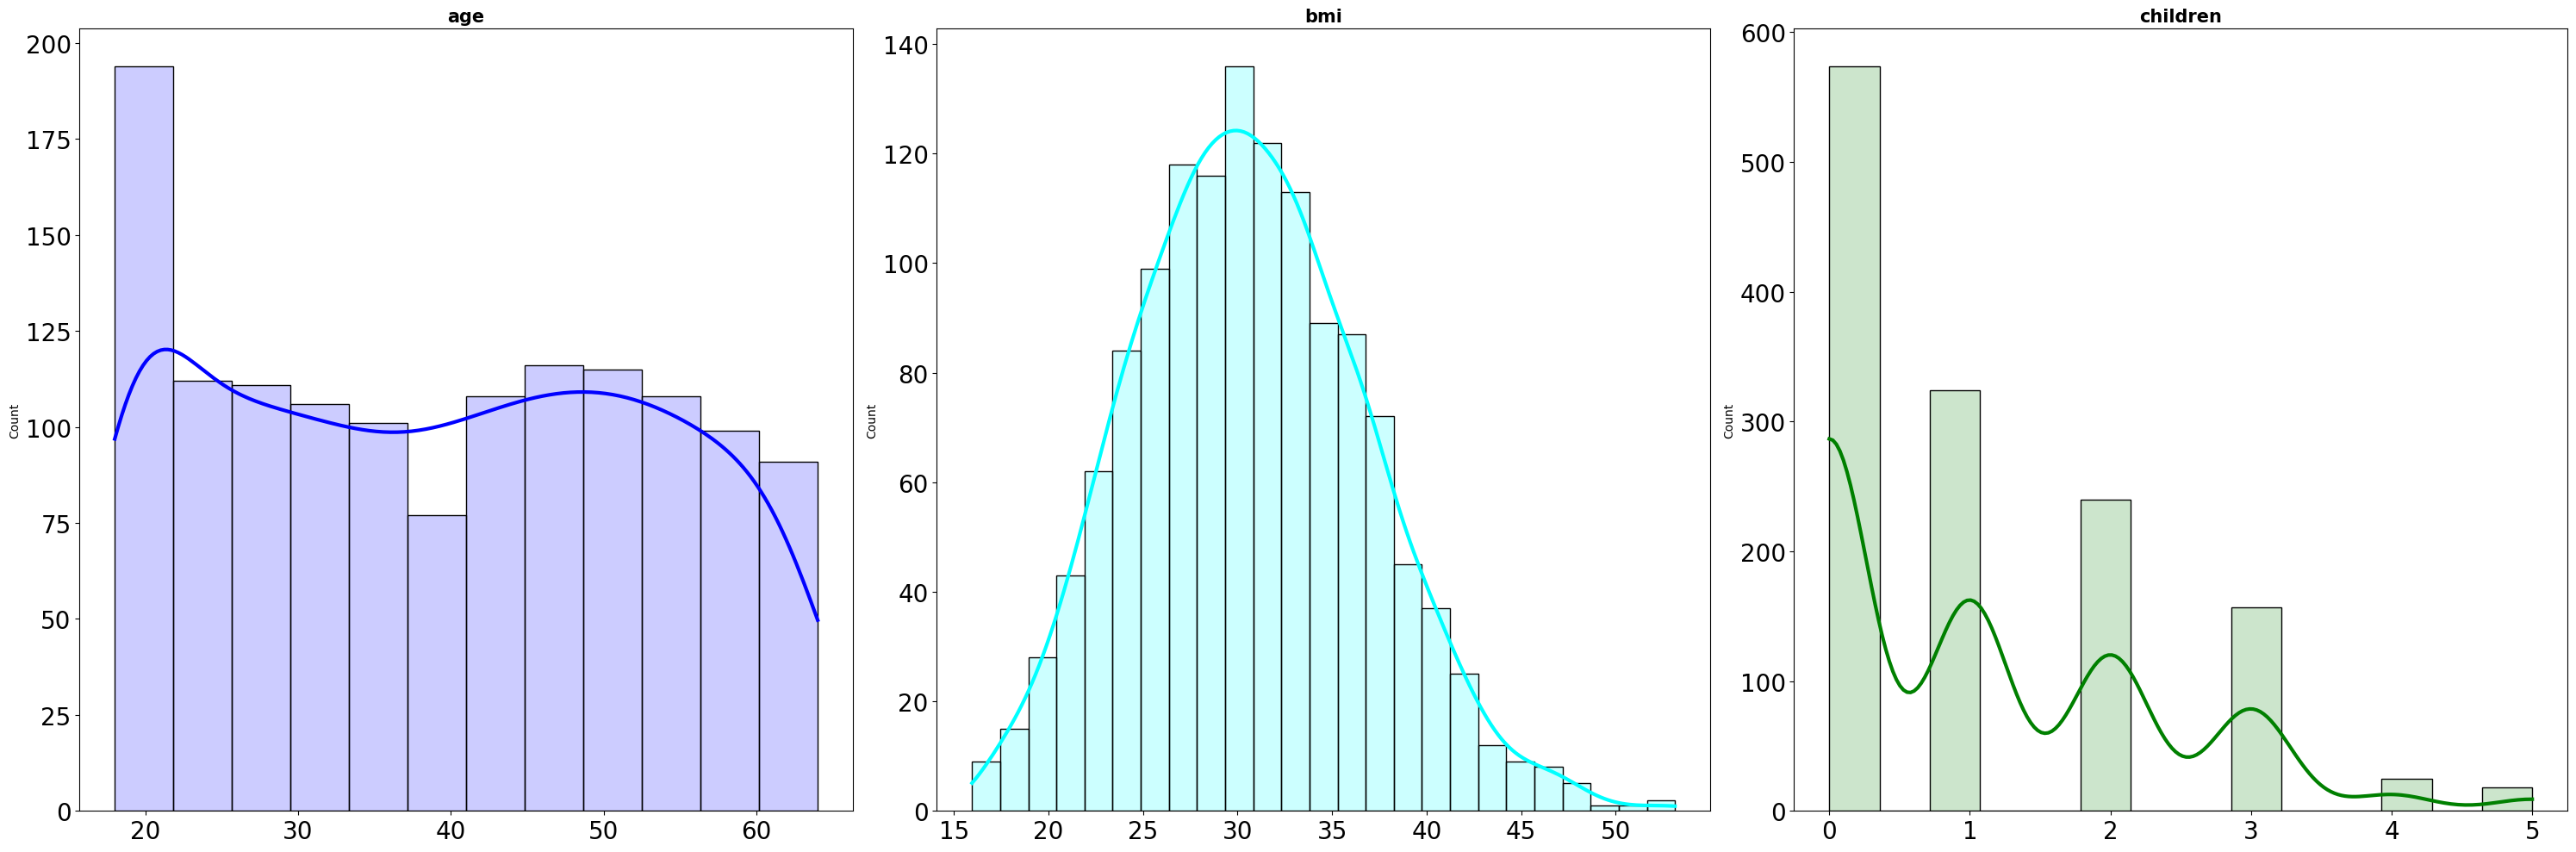

In [9]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "cyan","green"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 3}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

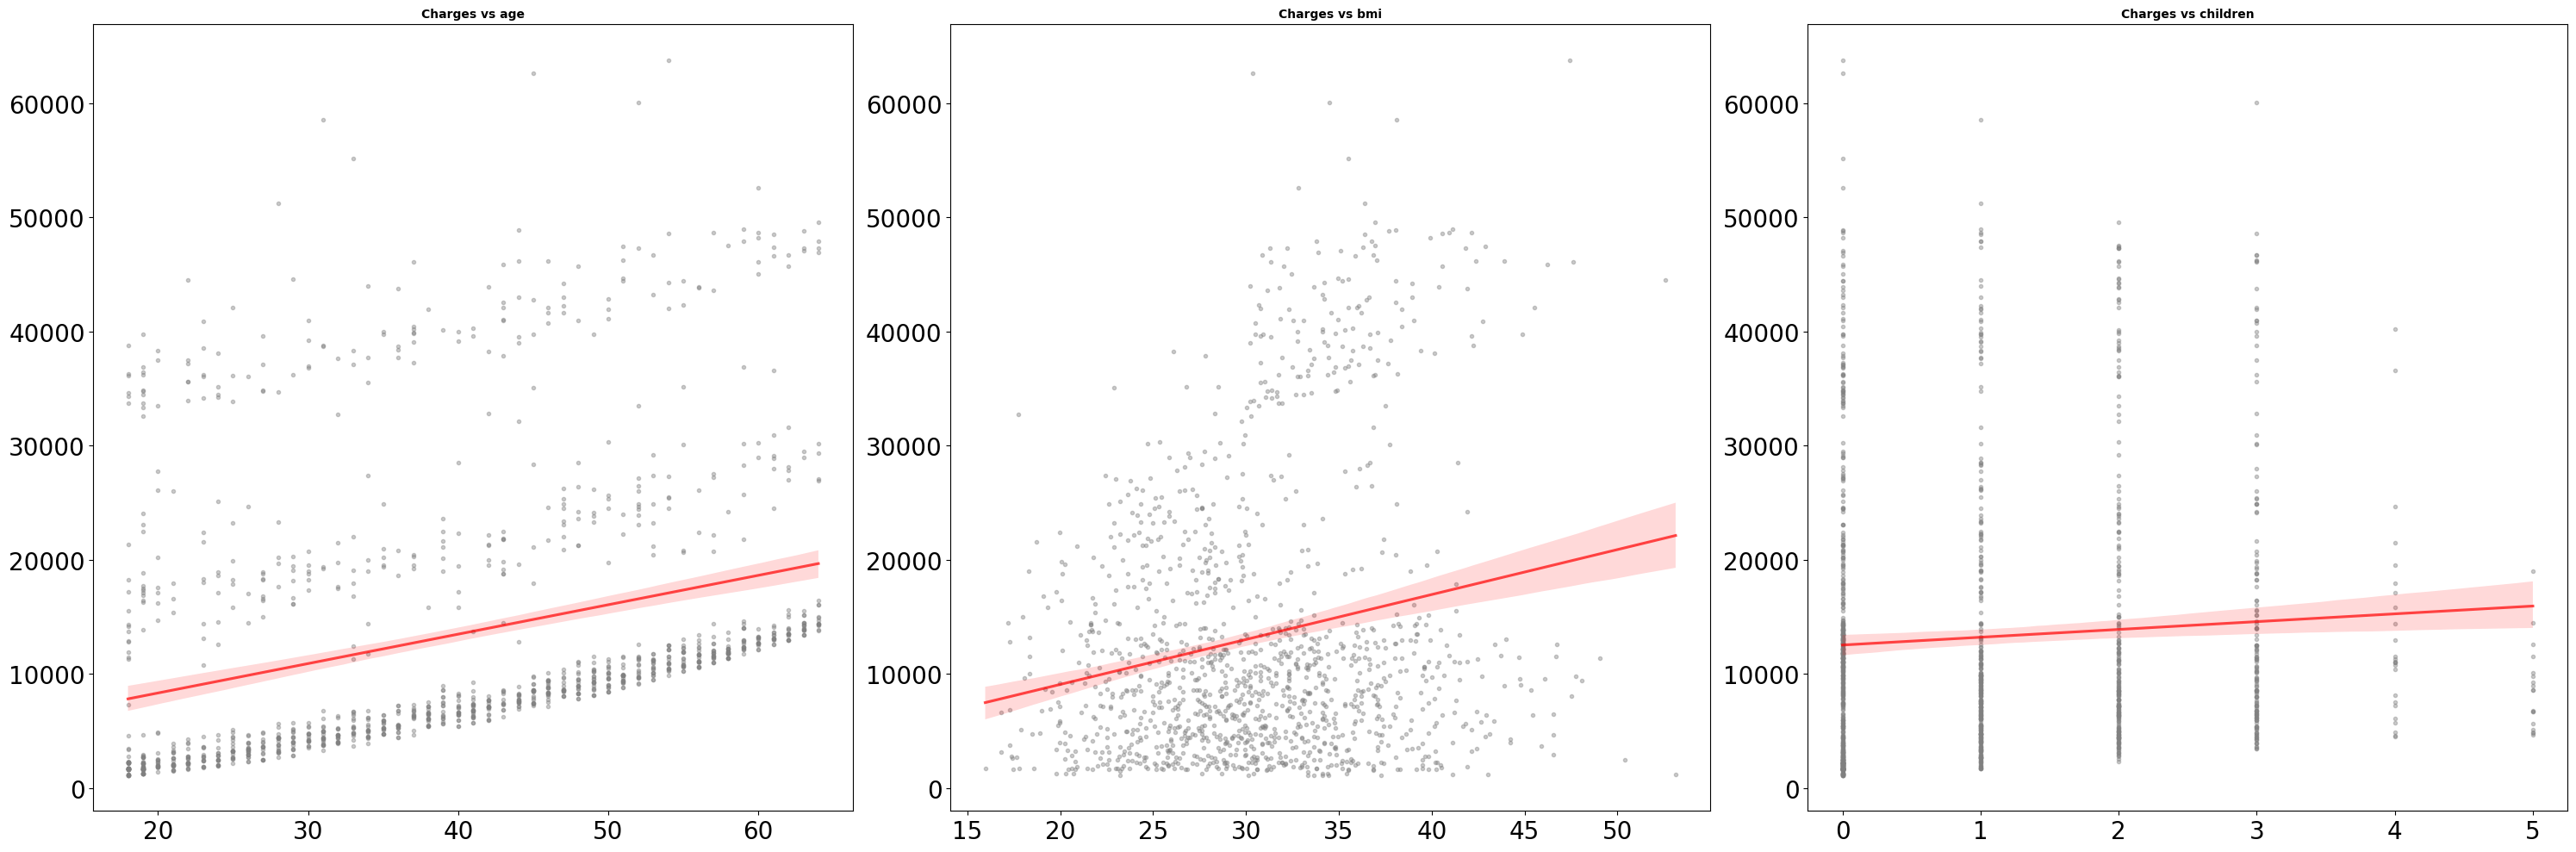

In [10]:
# Gráfico de relación entre variables predictoras y la variable a predecir
# ==============================================================================


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "cyan","green"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["charges"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Charges vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout();

### Correlación entre variables numéricas

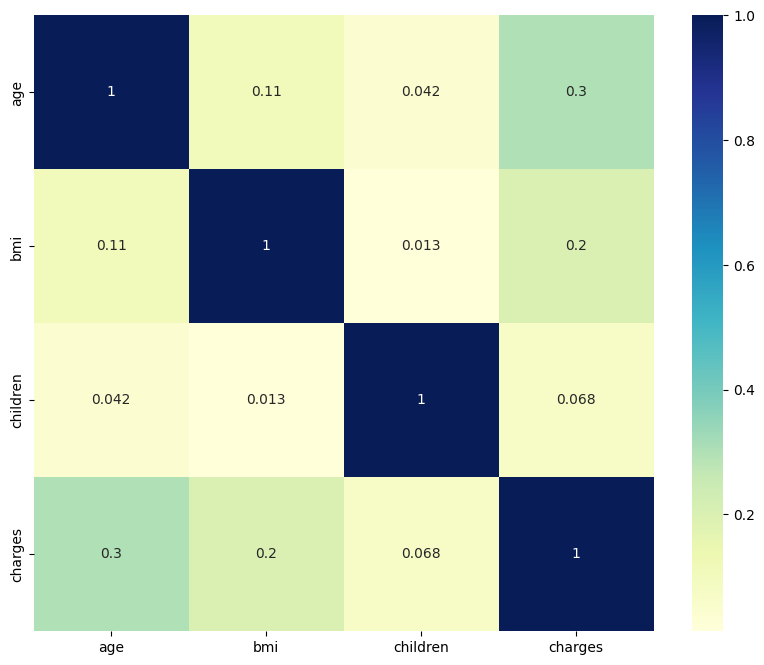

In [11]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);


In [12]:
mask = np.triu(np.ones_like(df.corr(), dtype = np.bool))
mask


array([[ True,  True,  True,  True],
       [False,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False,  True]])

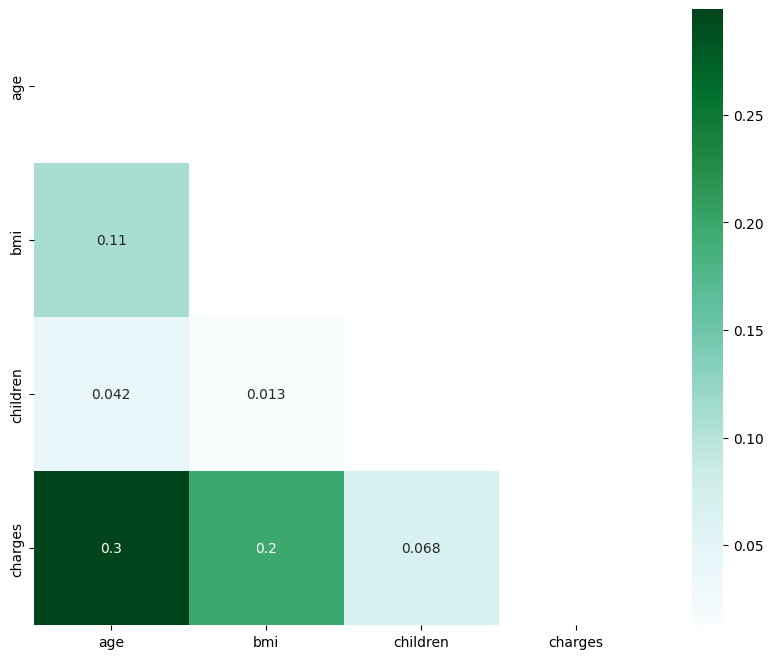

In [13]:
sns.heatmap(df.corr(), 
           cmap = "BuGn", 
            mask = mask,
           annot = True);

### Variables categóricas

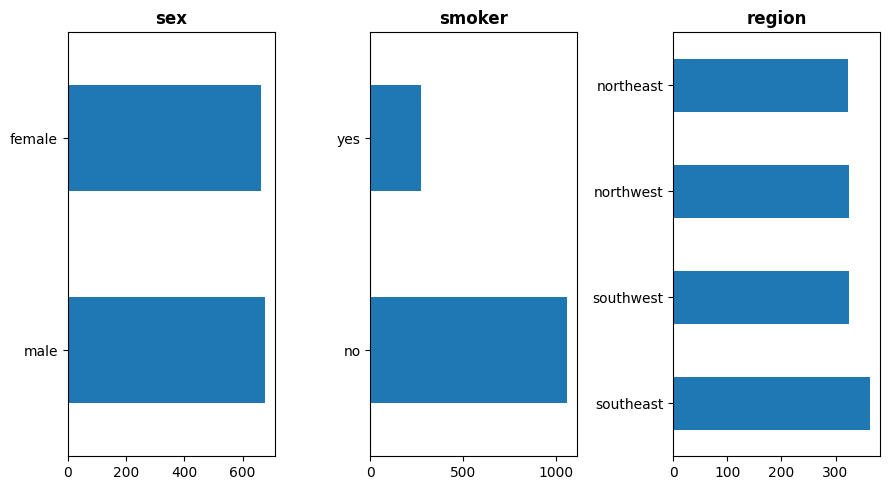

In [14]:
# Gráfico para cada variable cualitativa
# ==============================================================================

fig, axes = plt.subplots(1, 3, figsize = (9,5))

axes = axes.flat

columnas_object = df.select_dtypes(include = "object").columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 12, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    
fig.tight_layout();

### Outliers 

In [15]:
df_numericas = df.select_dtypes(include=np.number)
df_numericas= df_numericas.drop("charges", axis= 1)

df_numericas.head()

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0


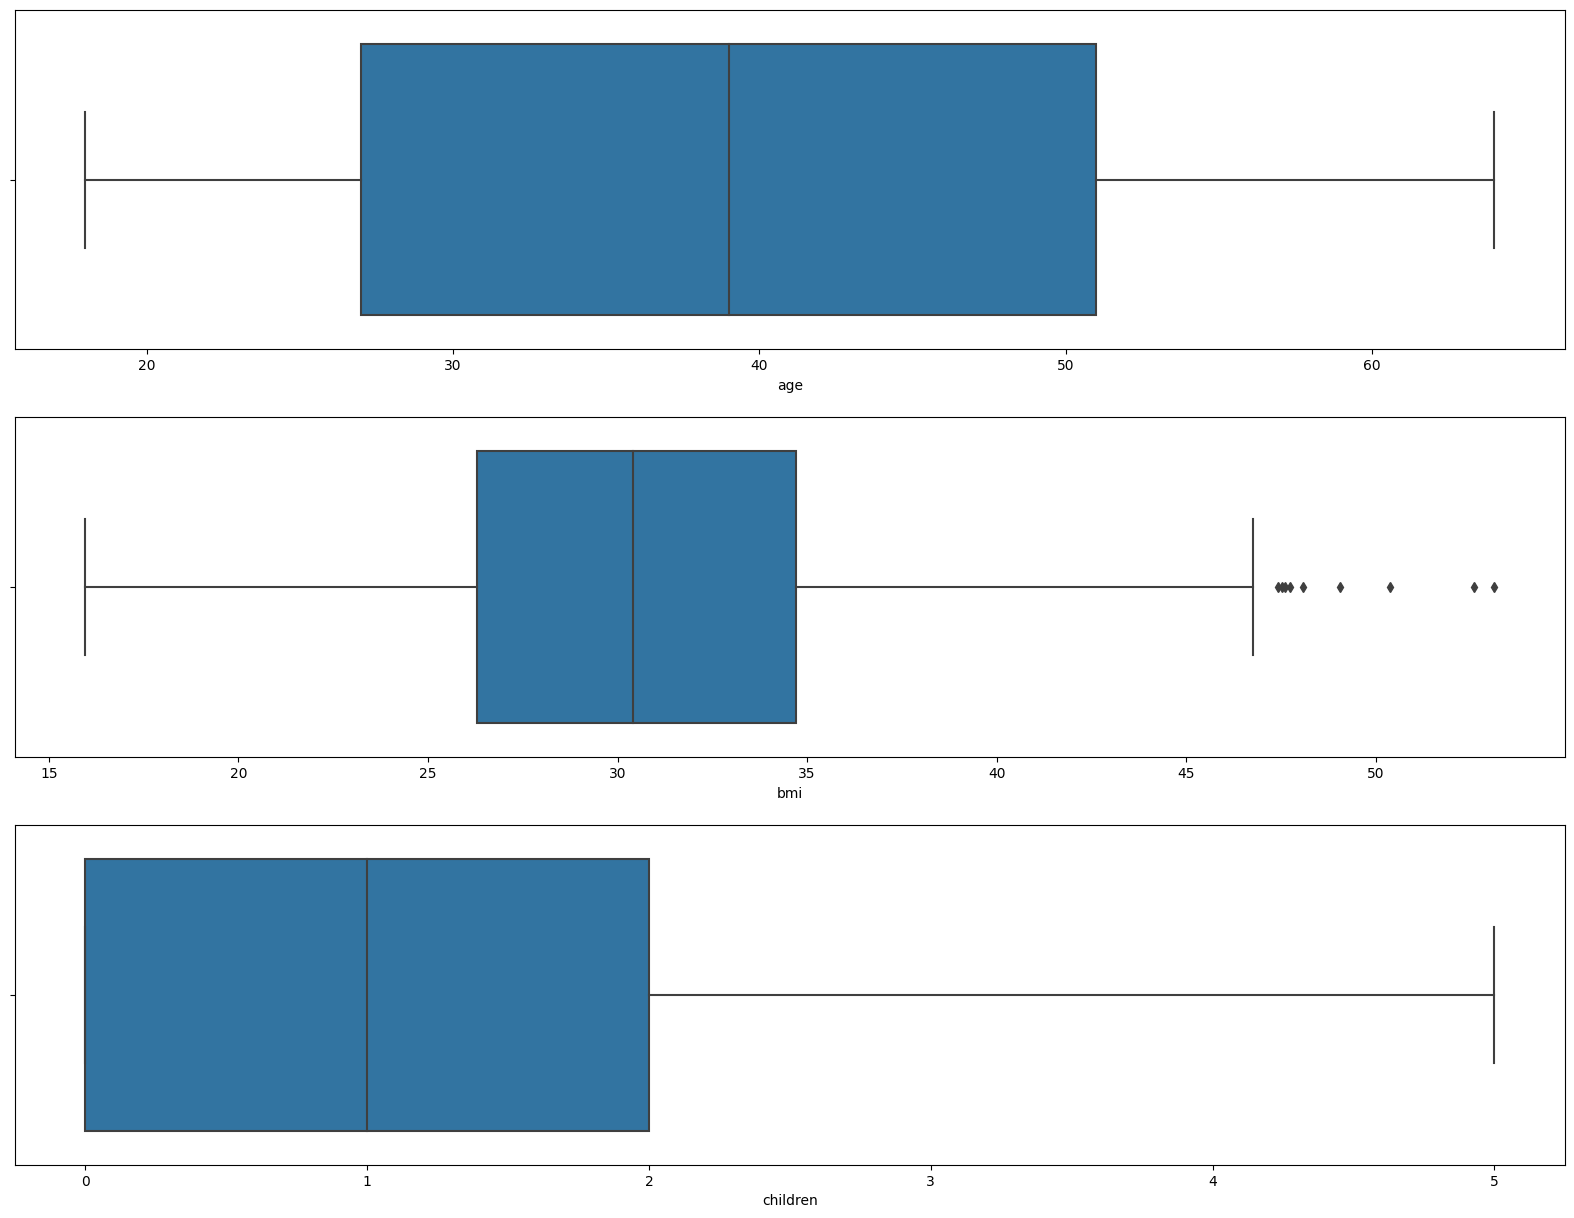

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    
    sns.boxplot(x=df_numericas.columns[i], 
                data=df_numericas, 
                ax=ax[i])
plt.show()

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [28]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['age', 'bmi', 'children'], dtype='object')

In [29]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'bmi': [116, 286, 401, 543, 847, 860, 1047, 1088, 1317]}


In [30]:
for k, v in ind.items():
    if k == "bmi":
        media = df[k].mean()
        for i in v:
            df.loc[i,k] = media 
    else: 
        mediana = df[k].median() 
        for i in v: 
            df.loc[i,k] = mediana 

In [31]:
df1 = df.select_dtypes(include = np.number)
df1= df1.drop("charges", axis=1)

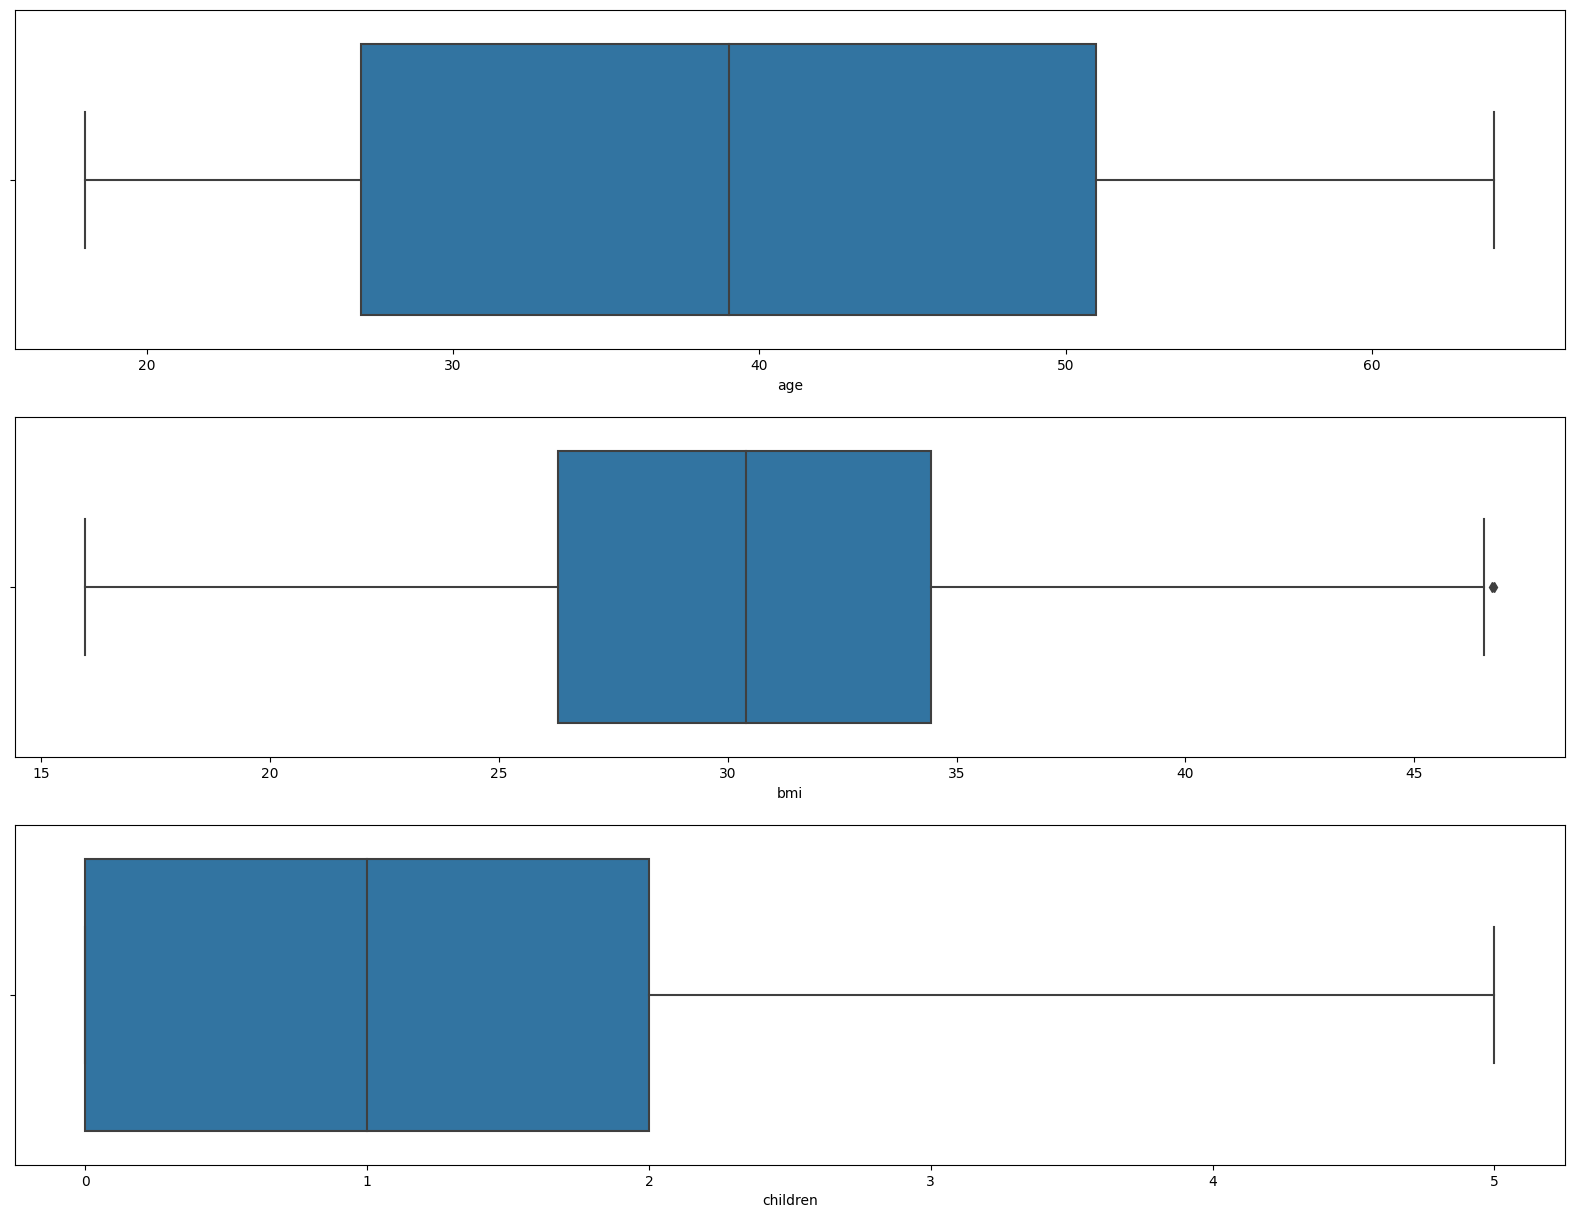

In [32]:
fig, ax = plt.subplots(3, 1, figsize=(20,15))

for i in range(len(df1.columns)):
    
    sns.boxplot(x=df1.columns[i], 
                data=df1, 
                ax=ax[i])
plt.show()

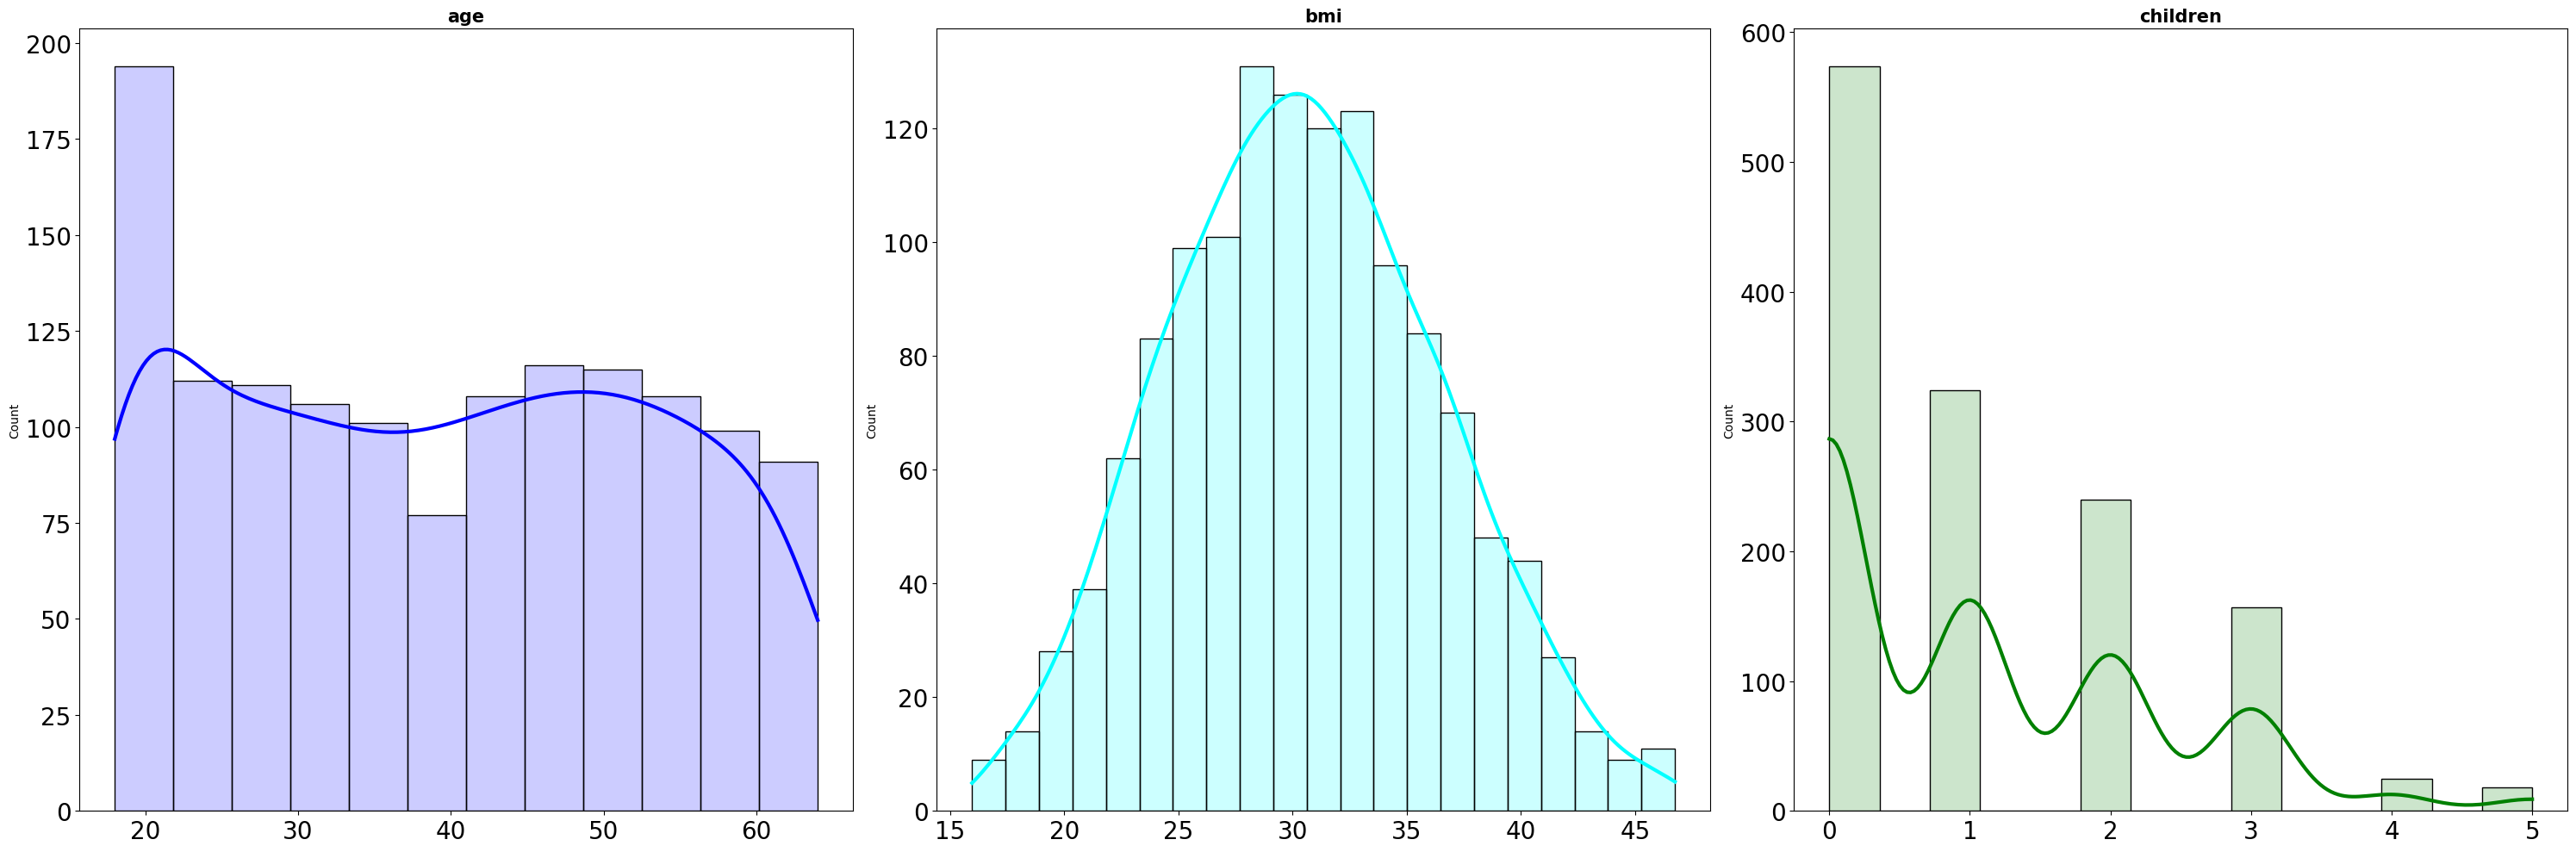

In [92]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "cyan","green"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("charges")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df1,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 3}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

### Estandarización 

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
df_numericas.head(2)

,age,bmi,children
0,19,27.90,0
1,18,33.77,1


In [36]:
# ajustamos nuestros datos

scaler.fit(df[columnas_numeric])

StandardScaler()

In [37]:
# transformamos los datos. 

X_escaladas = scaler.transform(df[columnas_numeric])
X_escaladas

array([[-1.43876426, -0.44731921, -0.90861367],
       [-1.50996545,  0.54796859, -0.07876719],
       [-0.79795355,  0.41741124,  1.58092576],
       ...,
       [-1.50996545,  1.07019796, -0.90861367],
       [-1.29636188, -0.8033847 , -0.90861367],
       [ 1.55168573, -0.24893987, -0.90861367]])

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
df2 = df.copy()

In [40]:
df2[columnas_numeric] = X_escaladas
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.447319,-0.908614,yes,southwest,16884.92400
1,-1.509965,male,0.547969,-0.078767,no,southeast,1725.55230
2,-0.797954,male,0.417411,1.580926,no,southeast,4449.46200
3,-0.441948,male,-1.328157,-0.908614,no,northwest,21984.47061
4,-0.513149,male,-0.281155,-0.908614,no,northwest,3866.85520


### Encoding 

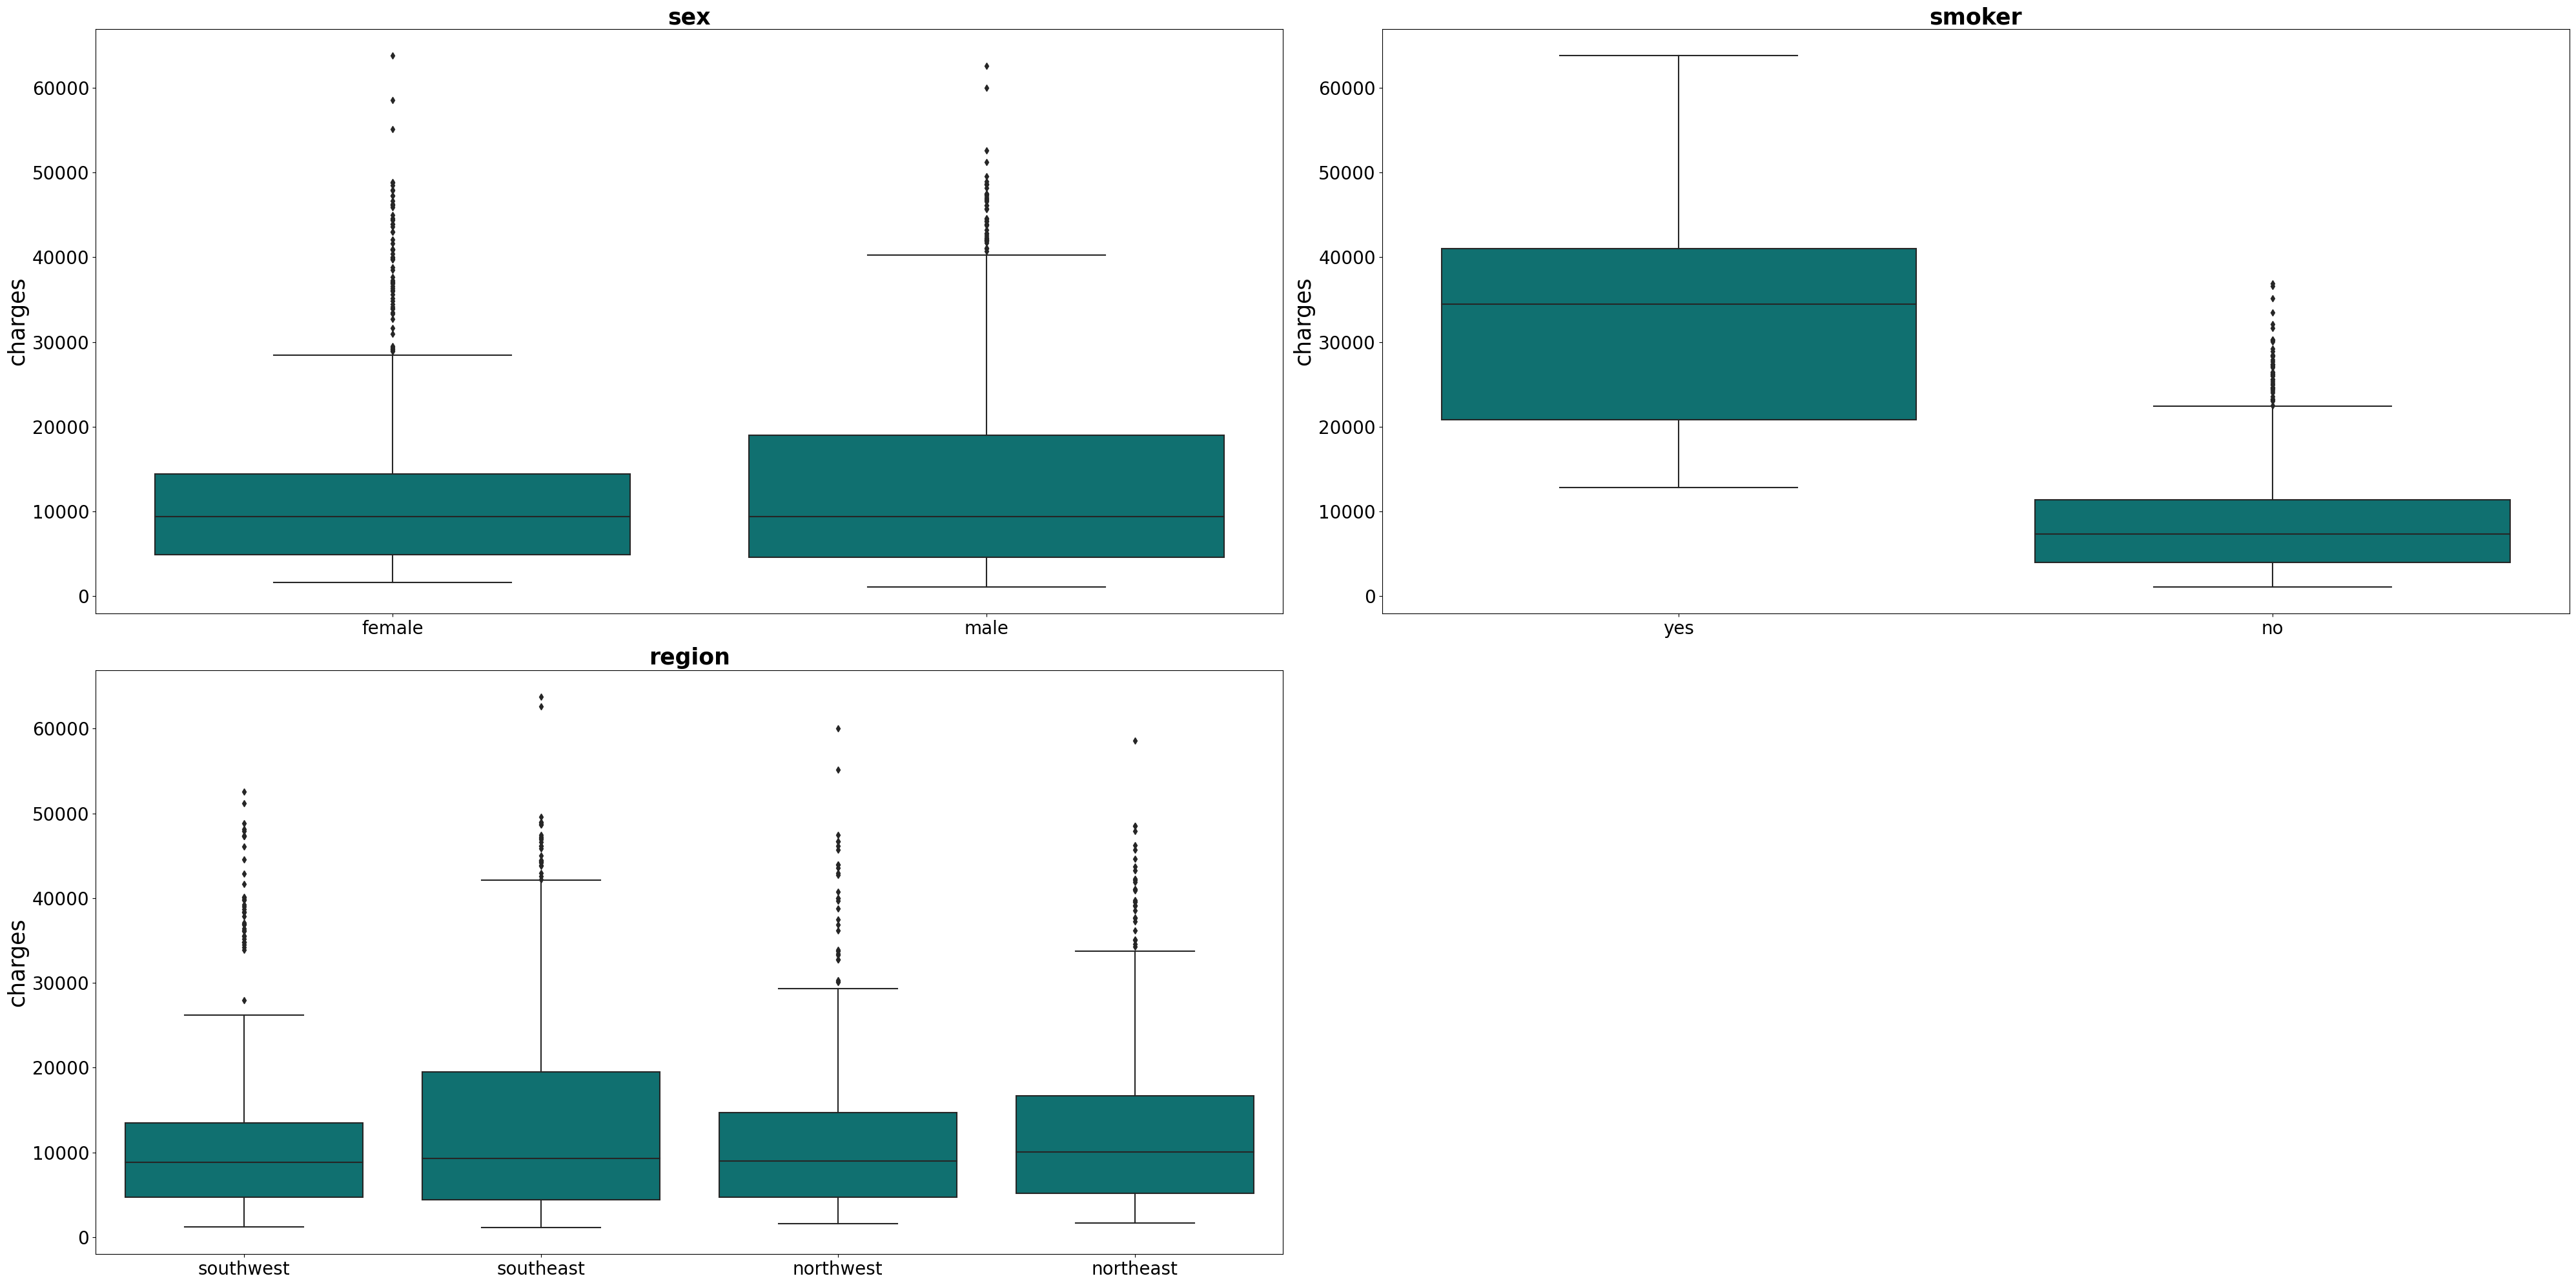

In [41]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_cat = df.select_dtypes(include = ["object", "category"]).columns

for i, colum in enumerate(columnas_cat): 
    sns.boxplot(
        data = df2,
        x = colum,
        y = "charges",
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 25, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "charges", fontsize = 25)

fig.delaxes(axes[-1])

fig.tight_layout();

###### Variables con orden 

In [42]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OrdinalEncoder 

In [43]:
df2.smoker.unique()

array(['yes', 'no'], dtype=object)

In [44]:
orden = [ "yes", "no" ]

In [45]:
# iniciamos el método y aplicamos la transformación a los datos. 

ordinal = OrdinalEncoder(categories = [orden], dtype = int)
transformados_oe = ordinal.fit_transform(df2[["smoker"]])

In [46]:
# lo convertimos a dataframe

oe_df =pd.DataFrame(transformados_oe)
oe_df.head()

,0
0,0
1,1
2,1
3,1
4,1


In [47]:
df2["smoker_encoded"] = oe_df

In [48]:
df2.head()

,age,sex,bmi,children,smoker,region,charges,smoker_encoded
0,-1.438764,female,-0.447319,-0.908614,yes,southwest,16884.92400,0
1,-1.509965,male,0.547969,-0.078767,no,southeast,1725.55230,1
2,-0.797954,male,0.417411,1.580926,no,southeast,4449.46200,1
3,-0.441948,male,-1.328157,-0.908614,no,northwest,21984.47061,1
4,-0.513149,male,-0.281155,-0.908614,no,northwest,3866.85520,1


##### Transformación Columna Género, etiquetado aleatorio 

In [49]:
# iniciamos el método

le = LabelEncoder()

In [50]:
def label_encoder(df, columnas):
    for col in df[columnas].columns:
        nuevo_nombre = col + "_encoded"
        df[nuevo_nombre] = le.fit_transform(df[col])
    return df

In [51]:
df2 = label_encoder(df2, ["sex"])
df2.head()

,age,sex,bmi,children,smoker,region,charges,smoker_encoded,sex_encoded
0,-1.438764,female,-0.447319,-0.908614,yes,southwest,16884.92400,0,0
1,-1.509965,male,0.547969,-0.078767,no,southeast,1725.55230,1,1
2,-0.797954,male,0.417411,1.580926,no,southeast,4449.46200,1,1
3,-0.441948,male,-1.328157,-0.908614,no,northwest,21984.47061,1,1
4,-0.513149,male,-0.281155,-0.908614,no,northwest,3866.85520,1,1


###### Variables Sin Orden 

In [52]:
dum= pd.get_dummies(df2["region"], prefix_sep = "_", prefix = "region", dtype = int)
dum.head()

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [53]:
df2[dum.columns] = dum
df2.drop(["region"], axis = 1, inplace = True)

In [54]:
df2.head()

,age,sex,bmi,children,smoker,charges,smoker_encoded,sex_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,female,-0.447319,-0.908614,yes,16884.92400,0,0,0,0,0,1
1,-1.509965,male,0.547969,-0.078767,no,1725.55230,1,1,0,0,1,0
2,-0.797954,male,0.417411,1.580926,no,4449.46200,1,1,0,0,1,0
3,-0.441948,male,-1.328157,-0.908614,no,21984.47061,1,1,0,1,0,0
4,-0.513149,male,-0.281155,-0.908614,no,3866.85520,1,1,0,1,0,0


### Árbol Decisión 

In [55]:
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [90]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [78]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df2.drop("charges", axis =1)
y = df2["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [81]:
#df2= df2.drop("sex", axis =1)

In [82]:
#df2= df2.drop("smoker", axis =1)

In [83]:
df2.head()

,age,bmi,children,charges,smoker_encoded,sex_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.447319,-0.908614,16884.92400,0,0,0,0,0,1
1,-1.509965,0.547969,-0.078767,1725.55230,1,1,0,0,1,0
2,-0.797954,0.417411,1.580926,4449.46200,1,1,0,0,1,0
3,-0.441948,-1.328157,-0.908614,21984.47061,1,1,0,1,0,0
4,-0.513149,-0.281155,-0.908614,3866.85520,1,1,0,1,0,0


In [84]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.82 µs


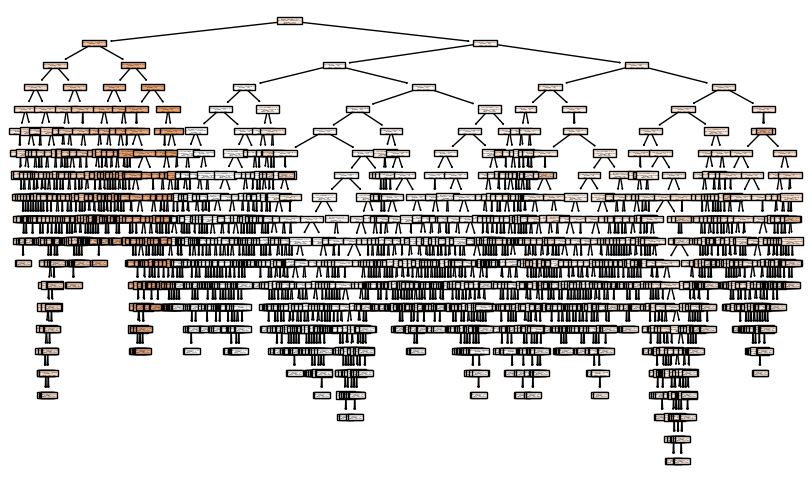

In [85]:
%time
fig = plt.figure(figsize=(10, 6))
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True)
plt.show();

#### Ajustamos nuestro árbol 

In [86]:
#max features
max_features = np.sqrt(len(X_train.columns))
max_features

3.0

In [87]:
#max depth
print(regressor.tree_.max_depth)

20


In [88]:
#hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [91]:
#sacamos las métricas para ver si hay overfitting

dt_r1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_r1

,MAE,MSE,RMSE,R2,set,modelo
0,2886.627979,3.911732e+07,6254.384431,0.748034,test,Decission Tree I
1,29.572515,2.442396e+05,494.205984,0.998308,train,Decission Tree I


❌ La diferencia del RMSE test/train, el valor y la distancia de R2, me indica que tenemos underfitting. No se si ha sido en la parte de estandarización donde he desvirtuado el dato numérico. Continuo aunque se que a continuación lo que haga no tendrá sentido hasta que no vuelva atrás. 

In [104]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": range(0,21),
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")


In [105]:
#ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 14.1 µs


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(0, 21), 'max_features': [1, 2, 3],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [106]:
#sacamos nuestra mejor opción de árbol

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=17, max_features=3, min_samples_split=10)

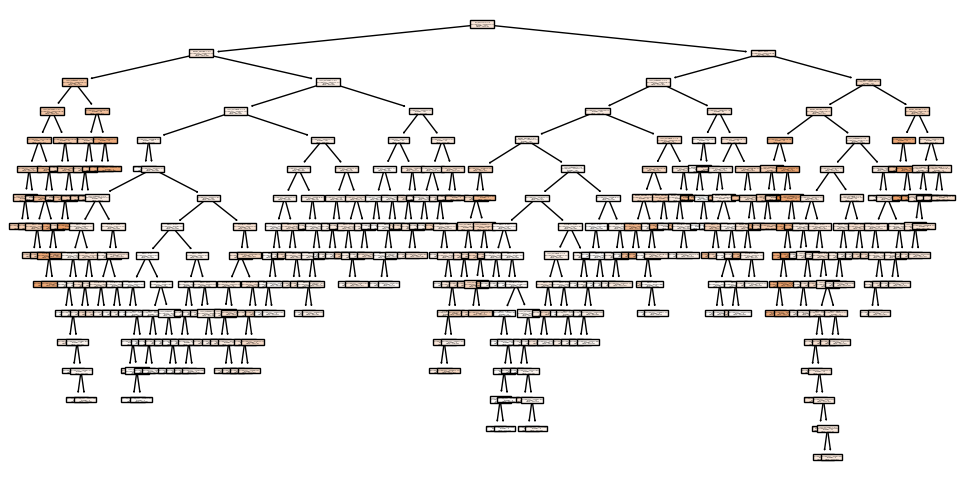

In [107]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_tree, feature_names=X_train.columns, filled=True);

In [109]:
# guardamos la imagen 

fig.savefig("decision_tree.png", facecolor="white")

In [108]:
print(tree.export_text(best_tree, feature_names= list(X_train.columns)))

|--- sex_encoded <= 0.50
|   |--- smoker_encoded <= 0.50
|   |   |--- region_southeast <= 0.50
|   |   |   |--- region_northeast <= 0.50
|   |   |   |   |--- age <= -0.48
|   |   |   |   |   |--- children <= 1.17
|   |   |   |   |   |   |--- region_northwest <= 0.50
|   |   |   |   |   |   |   |--- value: [24975.28]
|   |   |   |   |   |   |--- region_northwest >  0.50
|   |   |   |   |   |   |   |--- value: [24582.43]
|   |   |   |   |   |--- children >  1.17
|   |   |   |   |   |   |--- value: [16420.49]
|   |   |   |   |--- age >  -0.48
|   |   |   |   |   |--- children <= 2.41
|   |   |   |   |   |   |--- bmi <= -0.15
|   |   |   |   |   |   |   |--- age <= 0.52
|   |   |   |   |   |   |   |   |--- value: [20749.99]
|   |   |   |   |   |   |   |--- age >  0.52
|   |   |   |   |   |   |   |   |--- value: [26565.31]
|   |   |   |   |   |   |--- bmi >  -0.15
|   |   |   |   |   |   |   |--- children <= 1.17
|   |   |   |   |   |   |   |   |--- children <= -0.49
|   |   |   |   |   |  

In [110]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [112]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,4094.010476,5.696935e+07,7547.804066,0.633045,test,Decision tree II
1,2226.243320,1.618670e+07,4023.270119,0.887852,train,Decision tree II


Se confirma que no predice dado que mi RMSE solo va a peor por lo que no avanzo más hasta que sepa de donde proviene ese error.  